<div style="direction:rtl">
#### שמות המגישים:
</div>

<div style="direction:rtl"><h1>
# מעבדה 3 - כיול מצלמה  - בניית נתונים
</h></div>

<div style="direction:rtl">
עד כה יצרנו תצלומים באמצעות מצלמות אידאליות, שם הנקודה הראשית נמצאת בדיוק בראשית הצירים של מערכת התצלום.

על מנת שנוכל לבדוק מודלים של כיול של מצלמה, עלינו להכניס הזזה של הנקודה הראשית ועיוותי עדשה.

<div style="direction:rtl"><h2>
### חלק 1 - הנקודה הראשית

<div style="direction:rtl">
1.	כתבו פונקציה המייצרת נקודות במערכת התצלום כאשר הנקודה הראשית מוזזת מראשית הצירים.
      - *הוסיפו את הפונקציה למחלקה המתאימה*    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Camera
import SingleImage as sg

In [37]:
f = 35 # in milimeters
sensor_size = 25 # in milimeters
ppa = np.array([0.1,0.2]) # Principal point delta

cam1 = Camera.Camera(f, None, None, None, None, sensor_size)
img1 = sg.SingleImage(cam1)

n=5
x_img_o, y_img_o = img1.GeneratePointsImg(n, np.array([0,0])) # Points without shift
x_img, y_img = img1.GeneratePointsImg(n, ppa) # points with shift

def plotgrid(x_img,y_img, ax):
    ax.scatter(x_img,y_img)
    for i in range(x_img.shape[0]):
        for j in range(x_img.shape[1]):
            ax.annotate('('+str(np.round(x_img[i,j],2))+','+str(np.round(y_img[i,j],2))+')', \
                        (x_img[i,j], y_img[i,j]), size=8)

<div style="direction:rtl">
2.	נגדיר את מיקום הנקודה הראשית xp=100; yp=200 מיקרון. כיצד ישתנו ערכי הנקודות במערכת התצלום. הסבירו איזה ערכים אתם צופים לקבל. באיזו סוג התמרה השתמשתם?

<div style="direction:rtl"><b>
כל הנקודות יזוזו במינוס ערך התיקון
כאשר מדובר על התמרה אוקלידית ללא סיבוב

$$\begin{aligned}&\bar{x}=x-x_{p}\\&\bar{y}=y-y_{p}\end{aligned}$$

<div style="direction:rtl">
3.	הראו שהפונקציה מחזירה את הערכים שלהם ציפיתם. 

ללא עיוות
עם עיוות


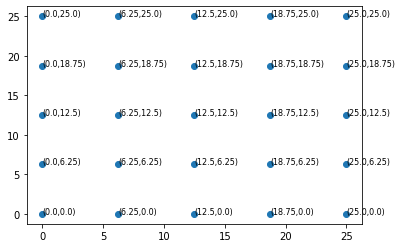

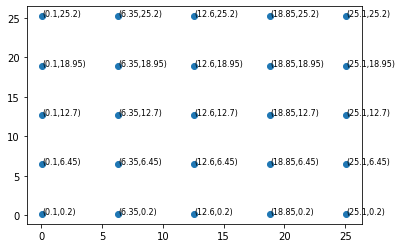

In [38]:

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

print('ללא עיוות')
plotgrid(x_img_o,y_img_o, ax)
print('עם עיוות')
plotgrid(x_img,y_img, ax2)

<div style="direction:rtl"><b>
אנו מקבלים נקודות עם עיוות מכוון בסדר גודל שהגדרנו (הזזה)

<div style="direction:rtl">
4.	כתבו פונקציה המתקנת את הנקודות בהינתן ערכי הנקודה הראשית אל מערכת המצלמה.
      - *הוסיפו את הפונקציה למחלקה המתאימה*    

In [39]:
y_v = y_img.reshape((y_img.shape[0]*y_img_o.shape[1],1)) # turning into vector
x_v = x_img.reshape((x_img.shape[0]*x_img_o.shape[1],1)) # turning into vector
principal_point = np.array([0.1,0.2])
camera_points = np.concatenate((x_v-sensor_size/2,-1*(y_v-sensor_size/2),f*np.ones((len(x_v),1))),axis=1)


def CorrectionToPrincipalPoint(camera_points):
    camera_points[:,0] = camera_points[:,0]-principal_point[0]
    camera_points[:,1] = camera_points[:,1]-principal_point[1]
    return camera_points




<div style="direction:rtl">
5.	הראו כי פתרון התצלום לאחר התיקון מוביל לערכים צפויים. 

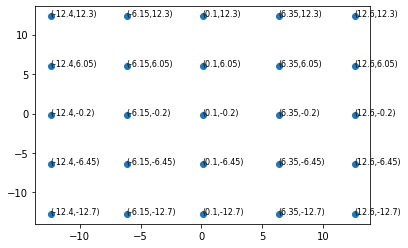

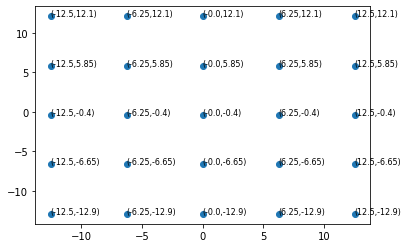

In [40]:
fig3, ax3 = plt.subplots()
plotgrid(camera_points[:,0].reshape((n,n)), \
         camera_points[:,1].reshape((n,n)), ax3)

camera_points_ppa_fixed = CorrectionToPrincipalPoint(camera_points)

fig4, ax4 = plt.subplots()
plotgrid(camera_points_ppa_fixed[:,0].reshape((n,n)), \
         camera_points_ppa_fixed[:,1].reshape((n,n)), ax4)

<div style="direction:rtl"><b>
הכן ניתן לראות כי התבצע תיקון במערכת המצלמה
(לנקודות יש שלושה ערכים)

<div style="direction:rtl"><h2>
### חלק 2 - עיוותים רדיאליים

<div style="direction:rtl">
6.	השתמשו במודל של העיוותים הרדיאליים שניתנה בהרצאה. מה יהיו ערכי K1  ו-K2 כך שהעיוות המקסימלי בתמונה לא יעלה על 50 מיקרון והעיוות הנתרם על ידי K2 לא יעלה על 10 מיקרון. ניתן להניח ש-K3=0.  

<div style="direction:rtl">
7.	הסתמכו על מודל העיוותים ועל K1 ו-K2 שמצאתם בסעיף הקודם, ובנו גרף המתאר את גודל העיוות הרדיאלי כתלות במרחק מהנקודה הראשית.

<div style="direction:rtl">
8.	כתבו פונקציה המוסיפה את העיוותים הרדיאליים (K1  ו-K2 ) של העדשה לנקודות במערכת התצלום.
      - *הוסיפו את הפונקציה למחלקה המתאימה*    

<div style="direction:rtl">
9.	השתמשו בערכי K1 ו-K2 שמצאתם בסעיף 6. הראו כיצד ישפיע מיקום שונה של הנקודה הראשית על גודל העיוות המדידות. 

<div style="direction:rtl">
10.	שרטטו את העיוותים. השתמשו ב- ()plt.quiver.

<div style="direction:rtl">
11.	האם גודל העיוות הרדיאלי תלוי בפיזור נקודות הבקרה? נמקו.

<div style="direction:rtl">
12.	האם גודל העיוות הרדיאלי תלוי באוריינטציית התצלום? נמקו.